# Chapter: Feedforward Neural Networks


# Topic: FFNN-based Soft Sensor for kamyr dataset

In [28]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [29]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(10)
import tensorflow
tensorflow.random.set_seed(20)

In [30]:
# fetch data
data = pd.read_csv('kamyr-digester.csv', usecols = range(1,23))       

In [31]:
# pre-process
# find the # of nan entries in each column
na_counts = data.isna().sum(axis = 0) 

# remove columns that have a lot of nan entries
data_cleaned = data.drop(columns = ['AAWhiteSt-4 ','SulphidityL-4 ']) 

# remove any row that have any nan entry
data_cleaned = data_cleaned.dropna(axis = 0) 

# separate X, y
y = data_cleaned.iloc[:,0].values[:,np.newaxis] # StandardScaler requires 2D array
X = data_cleaned.iloc[:,1:].values

print('Number of samples left: ', X.shape[0])

Number of samples left:  263


In [32]:
# separate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [33]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_est_scaled = X_scaler.fit_transform(X_est)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_est_scaled = y_scaler.fit_transform(y_est)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [34]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                  Define & Fit FFNN model without early stopping
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [35]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# define model
def FFNN_model():
    model = Sequential()
    model.add(Dense(20, activation='tanh', kernel_initializer='he_normal', input_shape=(19,)))
    model.add(Dense(5, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='Adam')
    return model

In [37]:
# fit model
history = FFNN_model().fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32, validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/250
5/5 [==============================] - 0s 14ms/step - loss: 1.3022 - val_loss: 1.4086
Epoch 2/250
5/5 [==============================] - 0s 3ms/step - loss: 1.1429 - val_loss: 1.2910
Epoch 3/250
5/5 [==============================] - 0s 3ms/step - loss: 1.0305 - val_loss: 1.1915
Epoch 4/250
5/5 [==============================] - 0s 3ms/step - loss: 0.9248 - val_loss: 1.1162
Epoch 5/250
5/5 [==============================] - 0s 3ms/step - loss: 0.8559 - val_loss: 1.0503
Epoch 6/250
5/5 [==============================] - 0s 3ms/step - loss: 0.7906 - val_loss: 0.9935
Epoch 7/250
5/5 [==============================] - 0s 3ms/step - loss: 0.7407 - val_loss: 0.9434
Epoch 8/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - val_loss: 0.9021
Epoch 9/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6531 - val_loss: 0.8632
Epoch 10/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6141 - val_loss: 0.8327
Epoch 11/250
5/5 [==========

5/5 [==============================] - 0s 3ms/step - loss: 0.1667 - val_loss: 0.5043
Epoch 85/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1642 - val_loss: 0.5045
Epoch 86/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1625 - val_loss: 0.5055
Epoch 87/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1610 - val_loss: 0.5067
Epoch 88/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1594 - val_loss: 0.5070
Epoch 89/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1583 - val_loss: 0.5090
Epoch 90/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1565 - val_loss: 0.5073
Epoch 91/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1549 - val_loss: 0.5066
Epoch 92/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1538 - val_loss: 0.5081
Epoch 93/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1526 - val_loss: 0.5105
Epoch 94/250
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0815 - val_loss: 0.5478
Epoch 167/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0811 - val_loss: 0.5474
Epoch 168/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0805 - val_loss: 0.5464
Epoch 169/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0796 - val_loss: 0.5491
Epoch 170/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0789 - val_loss: 0.5480
Epoch 171/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0785 - val_loss: 0.5492
Epoch 172/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0775 - val_loss: 0.5504
Epoch 173/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0768 - val_loss: 0.5516
Epoch 174/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0772 - val_loss: 0.5523
Epoch 175/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0759 - val_loss: 0.5516
Epoch 176/250
5/5 [=====

Epoch 249/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.5821
Epoch 250/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.5791


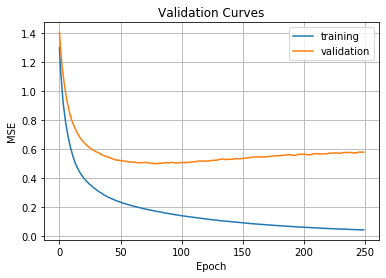

In [38]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.grid()
plt.show()

In [39]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                  Define & Fit FFNN model with early stopping
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [40]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(10)
import tensorflow
tensorflow.random.set_seed(20)

In [41]:
# fit model again with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=15)

history = FFNN_model().fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32, validation_data=(X_val_scaled, y_val_scaled), callbacks=es)

Epoch 1/250
5/5 [==============================] - 0s 15ms/step - loss: 1.3022 - val_loss: 1.4086
Epoch 2/250
5/5 [==============================] - 0s 3ms/step - loss: 1.1429 - val_loss: 1.2910
Epoch 3/250
5/5 [==============================] - 0s 3ms/step - loss: 1.0305 - val_loss: 1.1915
Epoch 4/250
5/5 [==============================] - 0s 3ms/step - loss: 0.9248 - val_loss: 1.1162
Epoch 5/250
5/5 [==============================] - 0s 4ms/step - loss: 0.8559 - val_loss: 1.0503
Epoch 6/250
5/5 [==============================] - 0s 3ms/step - loss: 0.7906 - val_loss: 0.9935
Epoch 7/250
5/5 [==============================] - 0s 3ms/step - loss: 0.7407 - val_loss: 0.9434
Epoch 8/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - val_loss: 0.9021
Epoch 9/250
5/5 [==============================] - 0s 4ms/step - loss: 0.6531 - val_loss: 0.8632
Epoch 10/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6141 - val_loss: 0.8327
Epoch 11/250
5/5 [==========

5/5 [==============================] - 0s 4ms/step - loss: 0.1693 - val_loss: 0.5032
Epoch 83/250
5/5 [==============================] - 0s 4ms/step - loss: 0.1678 - val_loss: 0.5040
Epoch 84/250
5/5 [==============================] - 0s 4ms/step - loss: 0.1667 - val_loss: 0.5043
Epoch 85/250
5/5 [==============================] - ETA: 0s - loss: 0.144 - 0s 4ms/step - loss: 0.1642 - val_loss: 0.5045
Epoch 86/250
5/5 [==============================] - 0s 4ms/step - loss: 0.1625 - val_loss: 0.5055
Epoch 87/250
5/5 [==============================] - 0s 4ms/step - loss: 0.1610 - val_loss: 0.5067
Epoch 88/250
5/5 [==============================] - 0s 4ms/step - loss: 0.1594 - val_loss: 0.5070
Epoch 89/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1583 - val_loss: 0.5090
Epoch 90/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1565 - val_loss: 0.5073
Epoch 91/250
5/5 [==============================] - 0s 3ms/step - loss: 0.1549 - val_loss: 0.5066
Epoch 92/

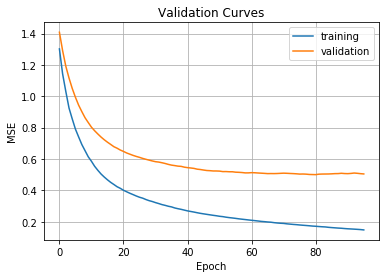

In [42]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.grid()
plt.show()